In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
import pandas as pd

dataset = pd.read_csv('../datasets/sentiment.csv')

# Extract out sentences and labels
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

In [14]:
# Print some example sentences and labels
for x in range(2):
    print(sentences[x])
    print(labels[x])
    print("\n")

So there is no way for me to plug it in here in the US unless I go by a converter.
0


Good case Excellent value.
1




In [15]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

# How big is the vocab size?
print("Vocab size is ", tokenizer.vocab_size)

Vocab size is  999


In [16]:
# Check that the tokenizer works appropriately
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]


In [17]:
# Separately print out each subword, decoded
for i in encoded:
    print(tokenizer.decode([i]))

I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


In [18]:
for i, sentence in enumerate(sentences):
    sentences[i] = tokenizer.encode(sentence)

In [19]:
import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sequences
sequences_padded = pad_sequences(sentences, maxlen=max_length,
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [20]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sequences, training_labels_final, epochs=num_epochs, validation_data=(testing_sequences, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 3s 10ms/step - loss: 0.6923 - accuracy: 0.5217 - val_loss: 0.6963 - val_accuracy: 0.4135
Epoch 2/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6901 - accuracy: 0.5374 - val_loss: 0.6948 - val_accuracy: 0.4536
Epoch 3/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.5744 - val_loss: 0.6877 - val_accuracy: 0.5564
Epoch 4/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6757 - accuracy: 0.6466 - val_loss: 0.6783 - val_accuracy: 0.6115
Epoch 5/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6606 - accuracy: 0.7043 - val_loss: 0.6617 - val_accuracy: 0.7143
Epoch 6/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6401 - accuracy: 0.7627 - val_loss: 0.6476 - val_accuracy: 0.7043
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.7828 - val_loss: 0.6249 - val_accuracy: 0.7168
Epoch 8/30
50/50 [=

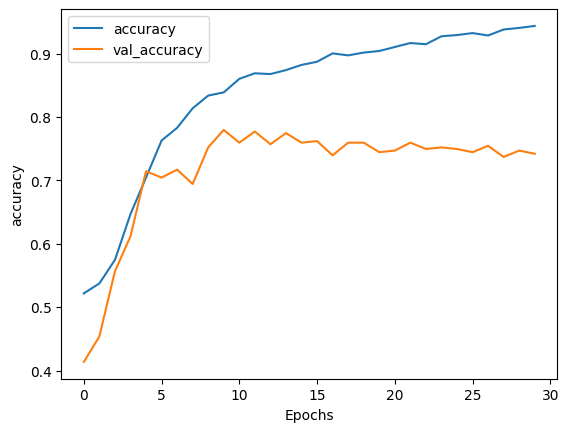

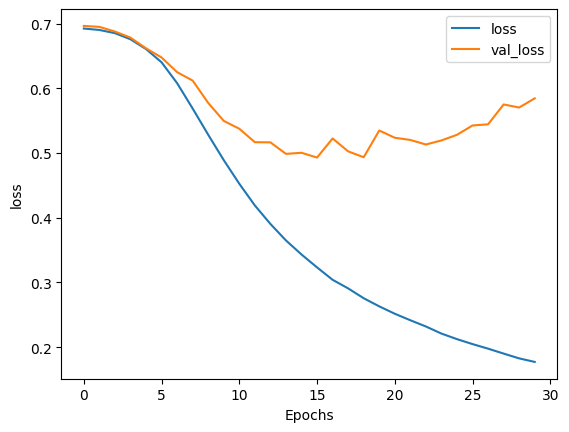

In [22]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [23]:
# Define a function to take a series of reviews
# and predict whether each one is a positive or negative review

# max_length = 100 # previously defined

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
    # Keep the original sentences so that we can keep using them later
    # Create an array to hold the encoded sequences
    new_sequences = []

    # Convert the new reviews to sequences
    for i, frvw in enumerate(new_sentences):
        new_sequences.append(tokenizer.encode(frvw))

    trunc_type='post'
    padding_type='post'

    # Pad all sequences for the new reviews
    new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length,
                                       padding=padding_type, truncating=trunc_type)

    classes = model.predict(new_reviews_padded)

    # The closer the class is to 1, the more positive the review is
    for x in range(len(new_sentences)):

        # We can see the padded sequence if desired
        # Print the sequence
        if (show_padded_sequence):
            print(new_reviews_padded[x])
        # Print the review as text
        print(new_sentences[x])
        # Print its predicted class
        print(classes[x])
        print("\n")

In [24]:
# Use the model to predict some reviews
fake_reviews = ["I love this phone",
                "Everything was cold",
                "Everything was hot exactly as I wanted",
                "Everything was green",
                "the host seated us immediately",
                "they gave us free chocolate cake",
                "we couldn't hear each other talk because of the shouting in the kitchen"
                ]

predict_review(model, fake_reviews)

1/1 [==============================] - 0s 67ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.8998229]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.1105316]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.31253088]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything w

In [25]:
def fit_model_now (model, sentences) :
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    history = model.fit(training_sequences, training_labels_final, epochs=num_epochs,
                        validation_data=(testing_sequences, testing_labels_final))
    return history

def plot_results (history):
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")

def fit_model_and_show_results (model, sentences):
    history = fit_model_now(model, sentences)
    plot_results(history)
    predict_review(model, sentences)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 32)               4224      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 20,429
Trainable params: 20,429
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
50/50 [==============================] - 6s 27ms/step - loss: 0.6902 - accuracy: 0.5223 - val_loss: 0.691

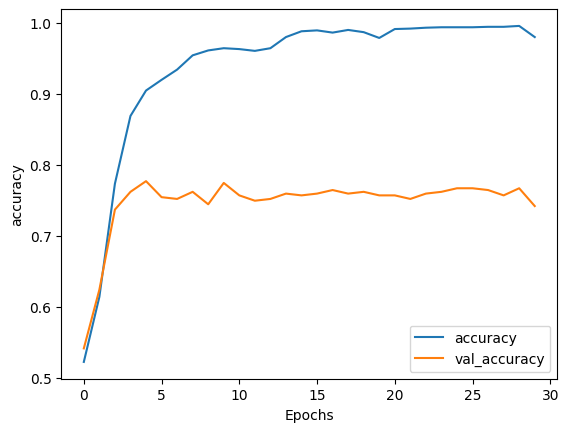

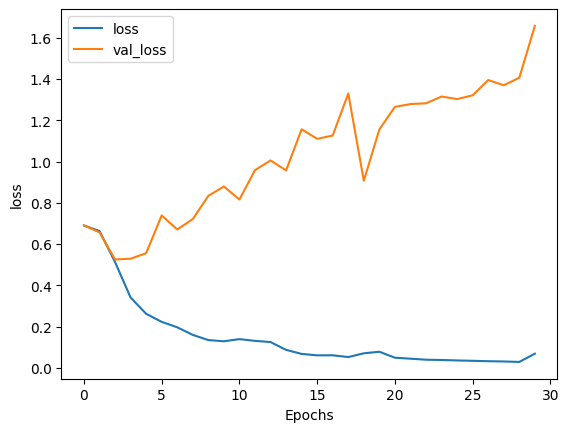

1/1 [==============================] - 1s 734ms/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9994474]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.02130129]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.44585806]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything

In [26]:
# Define the model
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model and then show the predictions for our extra sentences
fit_model_and_show_results(model_bidi_lstm, fake_reviews)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            16000     
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 32)           4224      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 26,701
Trainable params: 26,701
Non-trai

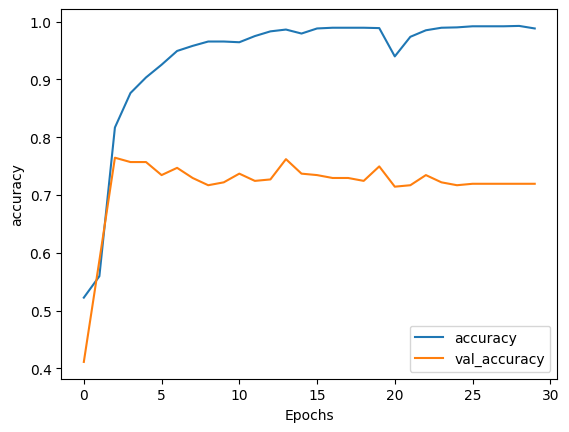

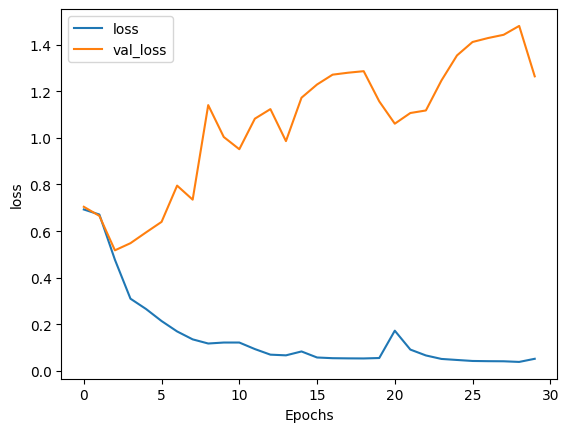

1/1 [==============================] - 1s 1s/step
[  4 281  16  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
I love this phone
[0.9991773]


[812 227 864 100 775   9 525 843   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was cold
[0.01693688]


[812 227 864 100 775   9 109   8 333 731  24  61   4 171  59  77   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything was hot exactly as I wanted
[0.01834115]


[812 227 864 100 775   9 157 359 853   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Everything wa

In [27]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fit_model_and_show_results(model_multiple_bidi_lstm, fake_reviews)

In [28]:
my_reviews =["lovely", "dreadful", "stay away",
             "everything was hot exactly as I wanted",
             "everything was not exactly as I wanted",
             "they gave us free chocolate cake",
             "I've never eaten anything so spicy in my life, my throat burned for hours",
             "for a phone that is as expensive as this one I expect it to be much easier to use than this thing is",
             "we left there very full for a low price so I'd say you just can't go wrong at this place",
             "that place does not have quality meals and it isn't a good place to go for dinner",
             ]

In [29]:
print("===================================\n","Embeddings only:\n", "===================================",)
predict_review(model, my_reviews, show_padded_sequence=False)

 Embeddings only:
1/1 [==============================] - 0s 18ms/step
lovely
[0.93067443]


dreadful
[0.32636386]


stay away
[0.6671238]


everything was hot exactly as I wanted
[0.74789184]


everything was not exactly as I wanted
[0.53187454]


they gave us free chocolate cake
[0.74329954]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.02307166]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.6215391]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.80499643]


that place does not have quality meals and it isn't a good place to go for dinner
[0.84147596]




In [30]:
print("===================================\n", "With a single bidirectional LSTM:\n", "===================================")
predict_review(model_bidi_lstm, my_reviews, show_padded_sequence=False)

 With a single bidirectional LSTM:
1/1 [==============================] - 0s 20ms/step
lovely
[0.9976508]


dreadful
[0.02598581]


stay away
[0.16463917]


everything was hot exactly as I wanted
[0.9878647]


everything was not exactly as I wanted
[0.0312248]


they gave us free chocolate cake
[0.99829]


I've never eaten anything so spicy in my life, my throat burned for hours
[0.9997265]


for a phone that is as expensive as this one I expect it to be much easier to use than this thing is
[0.0307963]


we left there very full for a low price so I'd say you just can't go wrong at this place
[0.99995947]


that place does not have quality meals and it isn't a good place to go for dinner
[0.99887687]




In [31]:
print("===================================\n","With two bidirectional LSTMs:\n", "===================================")
predict_review(model_multiple_bidi_lstm, my_reviews, show_padded_sequence=False

SyntaxError: incomplete input (925873974.py, line 2)